In [266]:
# We use sqlite 3 as a resource to help us work with sqlite in python
import sqlite3
# we install the datetime
from datetime import datetime, timedelta
#we need pandas to data clean and wrangle our data 
import pandas as pd
#I needed numpy to replace nan values 
import numpy as np
# we need plotly to visualise our data 
import matplotlib.pyplot as plt

#with the .connect method we can communicate 'connect with our sqlite database'
sqliteConnection = sqlite3.connect("BUSINESS.db")

#we have to create a varibale 'query' which will hold our sql statements
sqlite_select_Query = "SELECT * FROM BUZZ;"


In [267]:
#we use the .read_sql_query and conn 'connection' to view our data in dataform format
df=pd.read_sql_query(sqlite_select_Query,sqliteConnection)
# just to check our data
df.head(3)

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
1,BDCQ.SEA1AA,2011.09,78324.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
2,BDCQ.SEA1AA,2011.12,85850.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None


In [268]:
# we are able to sort our data using sql commands to form sensible queries and form dataframes
# below we can get data that is alredy cleaned using sql 
querry="SELECT Data_value,Period from BUZZ where Data_value NOTNULL; "
QP=pd.read_sql_query(querry,sqliteConnection)
QP

,Data_value,Period
0,80078.0,2011.06
1,78324.0,2011.09
2,85850.0,2011.12
3,90743.0,2012.03
4,81780.0,2012.06
...,...,...
16141,756812.0,2021.09
16142,772187.0,2021.12
16143,769623.0,2022.03
16144,775401.0,2022.06


In [269]:
# WE GROUP OUR DATA USING STATUS BELOW 
querry="SELECT Data_value,STATUS FROM BUZZ GROUP BY STATUS;"
QS=pd.read_sql_query(querry,sqliteConnection)
QS


,Data_value,STATUS
0,NaN,C
1,80078.0,F
2,83971.0,R


In [270]:
# we are able to see each age groups data_value 
querry="SELECT Series_title_2,Data_value FROM BUZZ GROUP BY Series_title_2 limit 11"
AQ=pd.read_sql_query(querry,sqliteConnection)
AQ

,Series_title_2,Data_value
0,15-19,98572
1,20-24,191834
2,25-29,184750
3,30-34,173195
4,35-39,186714
5,40-44,200611
6,45-49,200716
7,50-54,178833
8,55-59,140309
9,60-64,105985


In [292]:
querry="SELECT Series_title_2,Data_value FROM BUZZ GROUP BY  Series_title_2 LIKE '%MALE';"
GENDER=pd.read_sql_query(querry,sqliteConnection)
GENDER



,Series_title_2,Data_value
0,"Agriculture, Forestry and Fishing",80078
1,Male,861368


In [305]:
GENDER["Data_value"]

0     80078
1    861368
Name: Data_value, dtype: int64

In [306]:
GENDER["Series_title_2"]

0    Agriculture, Forestry and Fishing
1                                 Male
Name: Series_title_2, dtype: object

<AxesSubplot:>

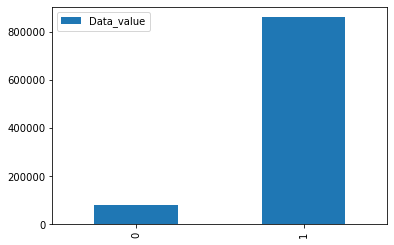

In [309]:
GENDER.plot(kind="bar",)

In [291]:
GENDER.to_excel("gender.xlsx")

In [208]:
#we analyse the columns
df.columns

Index(['Series_reference', 'Period', 'Data_value', 'Suppressed', 'STATUS',
       'UNITS', 'Magnitude', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')

In [209]:
# To know the rows and skip steps inbetween each 
df.index

RangeIndex(start=0, stop=20641, step=1)

In [210]:
# to identify the number of  the cols and rows in our dataframe
df.shape

(20641, 14)

In [211]:
# we continue with our analysis of all the data to identify more using the .info method
#Its clear period and datavale are the only numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  20641 non-null  object 
 1   Period            20641 non-null  float64
 2   Data_value        16146 non-null  float64
 3   Suppressed        2839 non-null   object 
 4   STATUS            20641 non-null  object 
 5   UNITS             20641 non-null  object 
 6   Magnitude         20641 non-null  int64  
 7   Subject           20641 non-null  object 
 8   Group             20641 non-null  object 
 9   Series_title_1    20641 non-null  object 
 10  Series_title_2    20641 non-null  object 
 11  Series_title_3    20641 non-null  object 
 12  Series_title_4    0 non-null      object 
 13  Series_title_5    0 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.2+ MB


In [232]:
# USING THE CORR METHOD WE FIND A CONNECTION AMONG OUR NUMERIC COLZ
df.corr()

,Period,Data_value,Magnitude
Period,1.000000,0.025577,-0.044687
Data_value,0.025577,1.000000,-0.227051
Magnitude,-0.044687,-0.227051,1.000000


<AxesSubplot:>

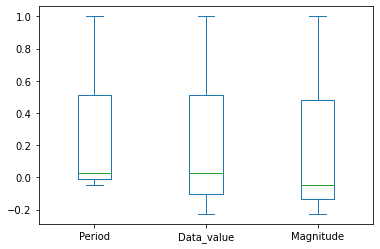

In [235]:
df.corr().plot(kind="box")

In [222]:
# we analyse the top and bottom of our df to see what columns have no values using the .tail and .head
df.isnull().tail()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
20636,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20637,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20638,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20639,False,False,True,False,False,False,False,False,False,False,False,False,True,True
20640,False,False,True,False,False,False,False,False,False,False,False,False,True,True


In [221]:
df.head(2)

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None
1,BDCQ.SEA1AA,2011.09,78324.0,None,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,None,None


In [178]:

# I decided to use the mean inorder to be used as a replacement for missing data 
df["Data_value"].mean
#Below we replce the empty rows with the mean its important to remember the role of numpy
#We should never forget to keep the settings inplace as True to apply to the df
df["Data_value"].replace(np.nan,80078.0,inplace=True)
#We select the data value in relation to the series'industry'




In [228]:
# we group our dataframe with period
qz=df.groupby(df["Period"])

<AxesSubplot:title={'center':'DATA VALUE EXPRESSED OVER THE YEARS'}, ylabel='Period'>

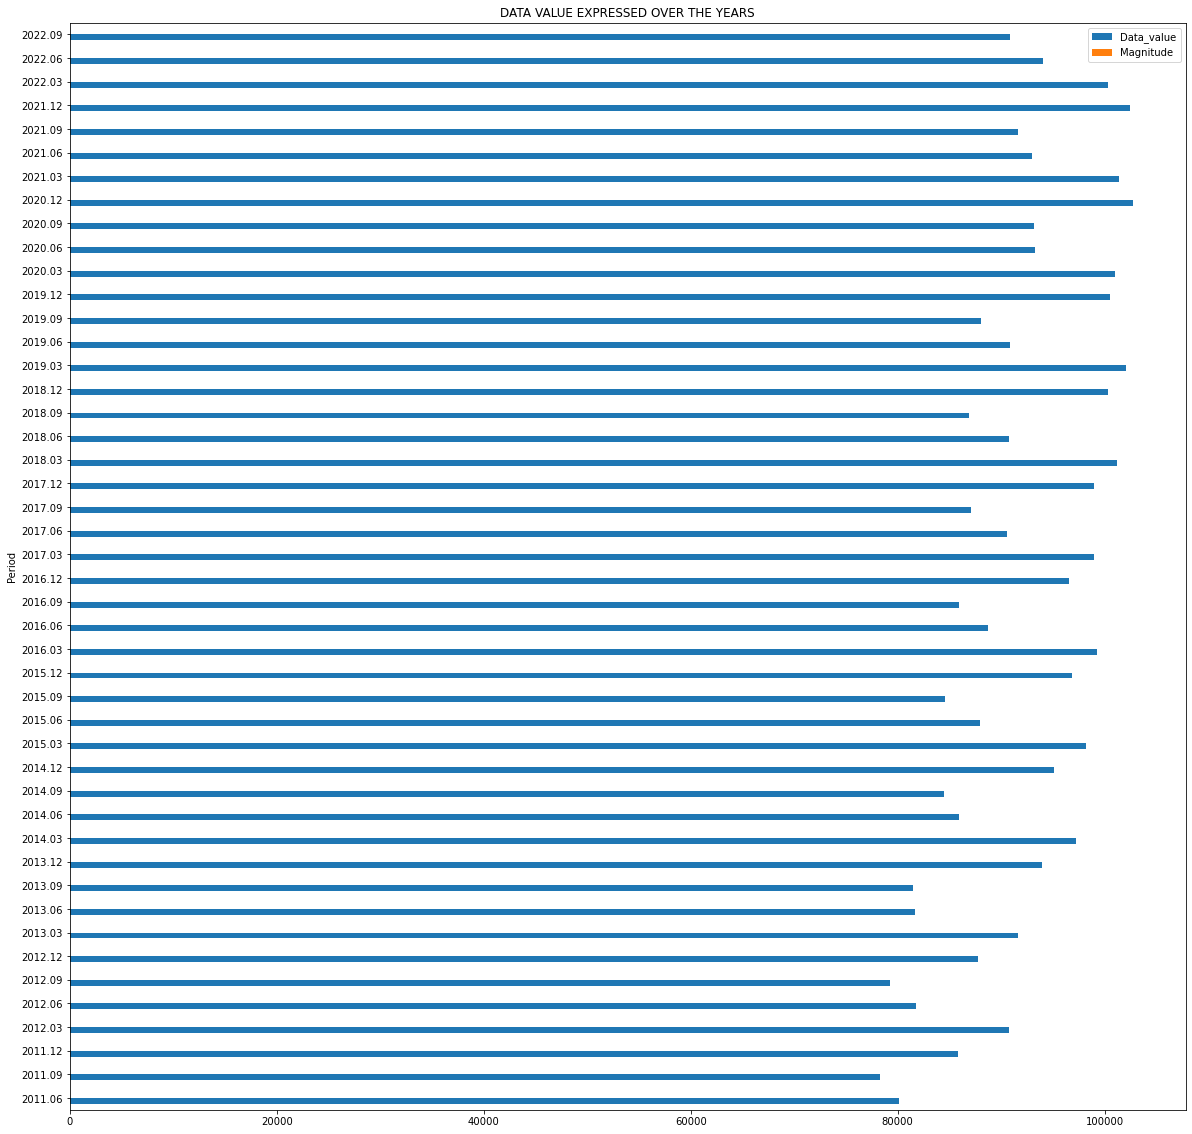

In [229]:
# using plorly we visualise our data 
qz.first().plot(kind="barh",figsize=(20,20),title="DATA VALUE EXPRESSED OVER THE YEARS")